In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Train_SU63ISt.csv",parse_dates=["Datetime"],index_col=["Datetime"])

In [3]:
df.drop("ID",axis=1,inplace=True)

In [64]:
y = df['Count'].resample('MS').mean()

In [65]:
y

Datetime
2012-01-01      9.104167
2012-02-01     17.500000
2012-03-01     12.604167
2012-04-01     10.750000
2012-05-01     12.083333
2012-06-01      9.333333
2012-07-01     11.020833
2012-08-01      5.848485
2012-09-01      5.522727
2012-10-01     12.887681
2012-11-01     12.549242
2012-12-01     15.981884
2013-01-01     40.688172
2013-02-01     46.833333
2013-03-01     43.037634
2013-04-01     53.213889
2013-05-01     65.811828
2013-06-01     65.783333
2013-07-01     72.250000
2013-08-01     95.193548
2013-09-01    103.069444
2013-10-01    113.220430
2013-11-01    119.061111
2013-12-01    119.373656
2014-01-01    201.464286
2014-02-01    221.346667
2014-03-01    205.616071
2014-04-01    253.645062
2014-05-01    289.309524
2014-06-01    289.302469
2014-07-01    319.470238
2014-08-01    362.577381
2014-09-01    404.484848
2014-10-01    313.111111
2014-11-01    304.416667
2014-12-01    289.185185
Freq: MS, Name: Count, dtype: float64

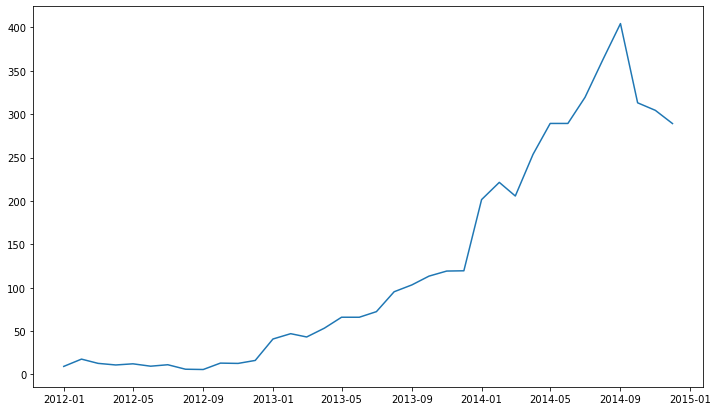

In [68]:
plt.figure(figsize=(12,7))
plt.plot(y)

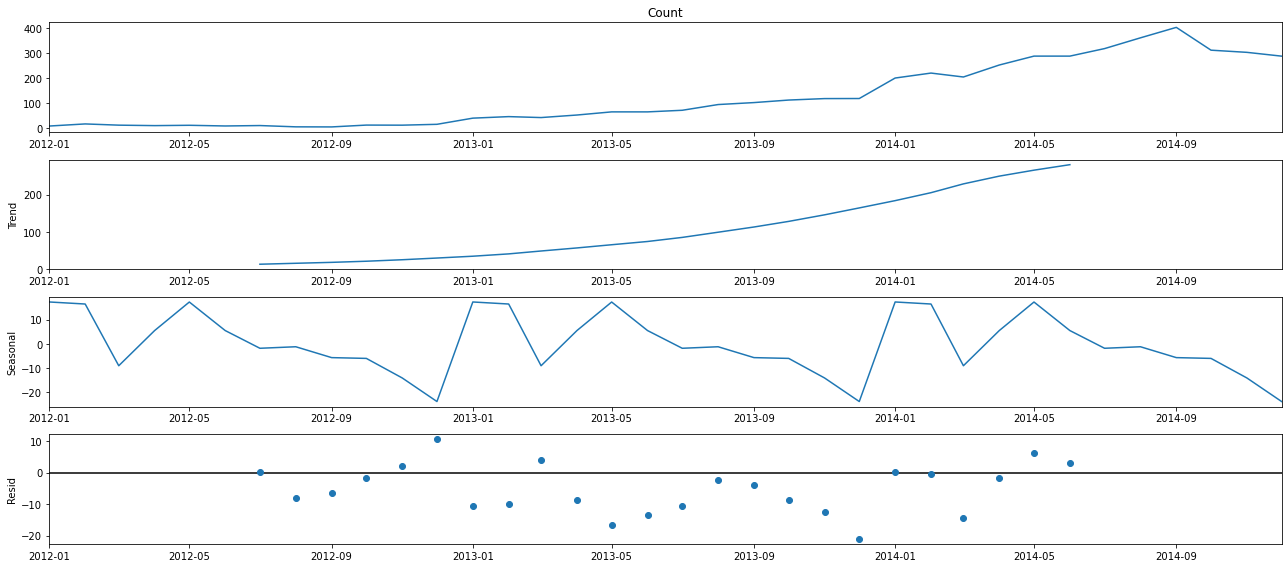

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

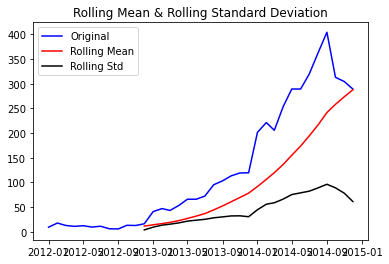

In [67]:
rolling_mean = y.rolling(window = 12).mean()
rolling_std = y.rolling(window = 12).std()
plt.plot(y, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [70]:
result = adfuller(y)
print("AD Fuller test")
print("P value : ",result[1])

AD Fuller test
P value :  0.009086436468936764


In [72]:
# Additive Decomposition
add_result = seasonal_decompose(y, model='additive',period=1)
# Multiplicative Decomposition 
mul_result = seasonal_decompose(y, model='multiplicative',period=1)

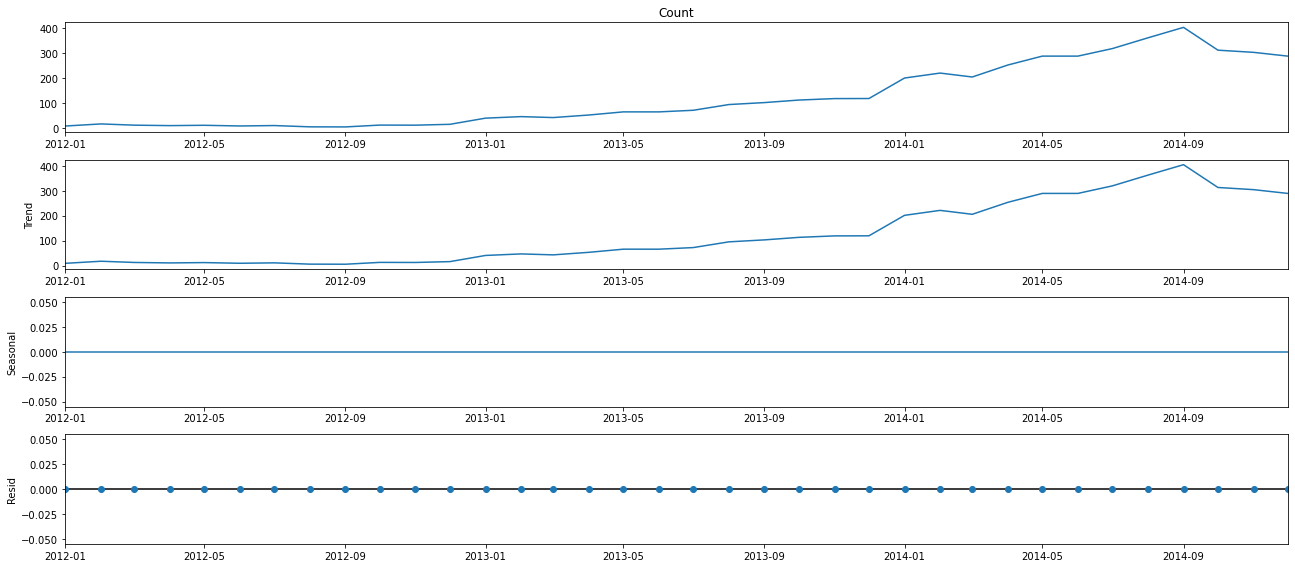

In [73]:
add_result.plot()
plt.show()

In [74]:
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasoanilty,trend,residual,actual_values
Datetime,,,,
2012-01-01,0.0,9.104167,0.0,9.104167
2012-02-01,0.0,17.500000,0.0,17.500000
2012-03-01,0.0,12.604167,0.0,12.604167
2012-04-01,0.0,10.750000,0.0,10.750000
2012-05-01,0.0,12.083333,0.0,12.083333


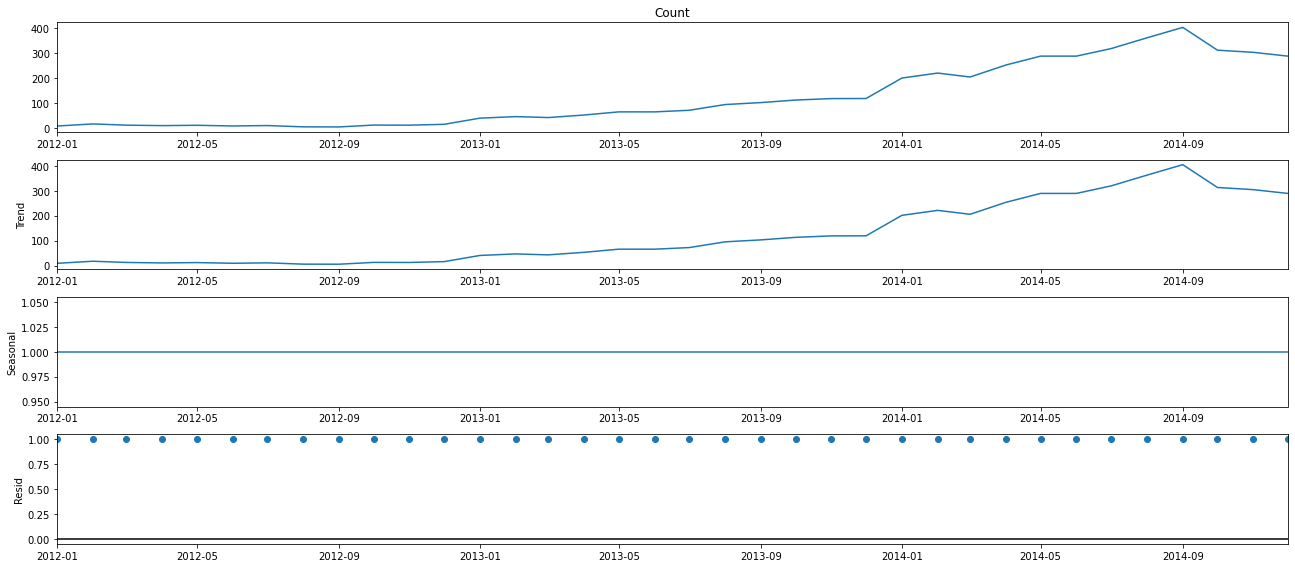

In [75]:
mul_result.plot()
plt.show()

In [76]:
new_df_add = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasoanilty,trend,residual,actual_values
Datetime,,,,
2012-01-01,1.0,9.104167,1.0,9.104167
2012-02-01,1.0,17.500000,1.0,17.500000
2012-03-01,1.0,12.604167,1.0,12.604167
2012-04-01,1.0,10.750000,1.0,10.750000
2012-05-01,1.0,12.083333,1.0,12.083333


In [91]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [92]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:464.39726170448466
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:313.9365331443239
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:301.63469471177456
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:149.8682672366464
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:270.85009804863193
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:261.7550668038797
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:143.1099835364326
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:133.61882056590676
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:412.9896877701739
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:277.38534581743653
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:265.2158538277231
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:126.73615413696282
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:256.71296641681687
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:239.91868306974658
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:137.72939533276528
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:128.72991686322518
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:324.1868393300169
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:220.97044540703172

In [93]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7812      4.119      0.190      0.850      -7.293       8.855
ma.L1         -0.7228      4.551     -0.159      0.874      -9.643       8.197
ar.S.L12      -0.6195    795.809     -0.001      0.999   -1560.377    1559.138
ma.S.L12       0.8919   1635.764      0.001      1.000   -3205.146    3206.930
sigma2       759.5207   6.34e+05      0.001      0.999   -1.24e+06    1.24e+06


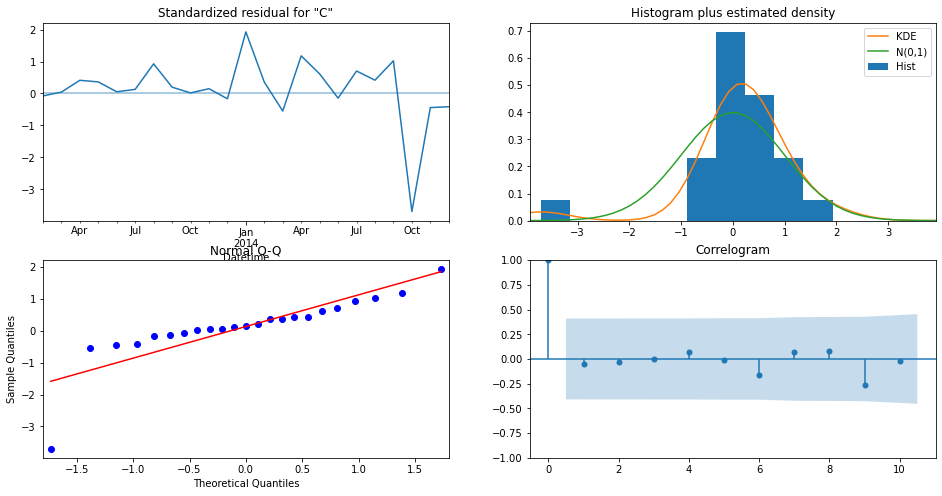

In [94]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

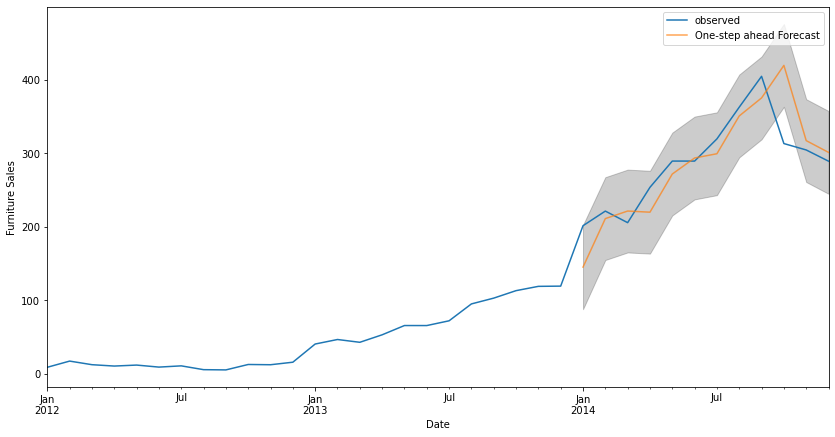

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [96]:
y_forecasted = pred.predicted_mean
y_truth = y["2014-01-01":]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1499.01


In [97]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 38.72


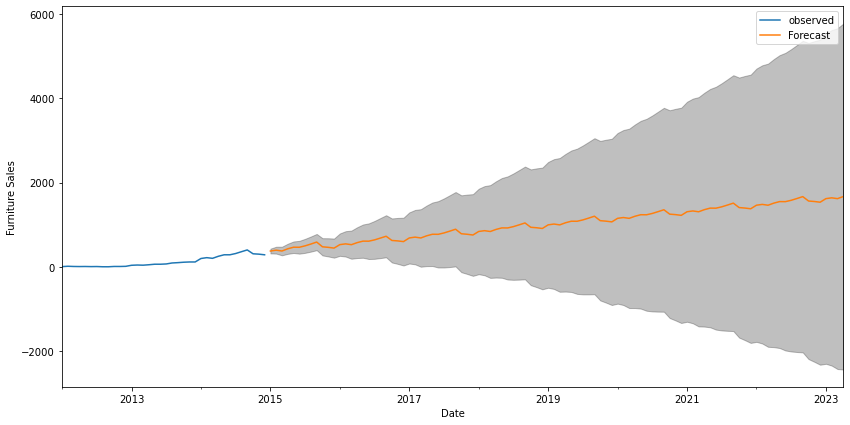

In [98]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [99]:
y_forecasted

Datetime
2014-01-01    145.219596
2014-02-01    211.139224
2014-03-01    221.409049
2014-04-01    219.848118
2014-05-01    271.712057
2014-06-01    293.503013
2014-07-01    299.281047
2014-08-01    350.631937
2014-09-01    375.127728
2014-10-01    419.345669
2014-11-01    317.112070
2014-12-01    301.119199
Freq: MS, Name: predicted_mean, dtype: float64